In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [425]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [426]:
# Read data
df = pd.read_csv('df.csv')
df

,index,A,B,C,D,E,F,G,H,I,type
0,0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...
209,209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [427]:
# Number of rows
n_rows = len(df)
n_rows

214

In [428]:
# Column names
column_names = df.columns
column_names

Index(['index', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'type'], dtype='object')

In [429]:
# Dimensions
dimensions = df.shape
dimensions

(214, 11)

In [430]:
# Describle your datas
df.describe()

,index,A,B,C,D,E,F,G,H,I,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,106.500000,1.670467,16.089626,3.489813,2.745140,101.711215,0.745748,14.330888,0.297710,0.102757,1.542056
std,61.920648,0.003324,0.979979,1.875170,0.948929,1.084305,0.978743,2.276731,0.845669,0.175548,1.707648
min,0.000000,1.660000,12.880000,0.000000,0.550000,97.730000,0.000000,8.690000,0.000000,0.000000,0.000000
25%,53.250000,1.670000,15.490000,2.752500,2.260000,101.190000,0.185000,13.180000,0.000000,0.000000,0.000000
50%,106.500000,1.670000,15.960000,4.520000,2.580000,101.910000,0.830000,13.760000,0.000000,0.000000,1.000000
75%,159.750000,1.670000,16.592500,4.680000,3.100000,102.325000,0.920000,14.677500,0.000000,0.180000,2.000000
max,213.000000,1.690000,20.860000,5.840000,6.650000,105.570000,9.320000,25.900000,5.360000,0.920000,5.000000


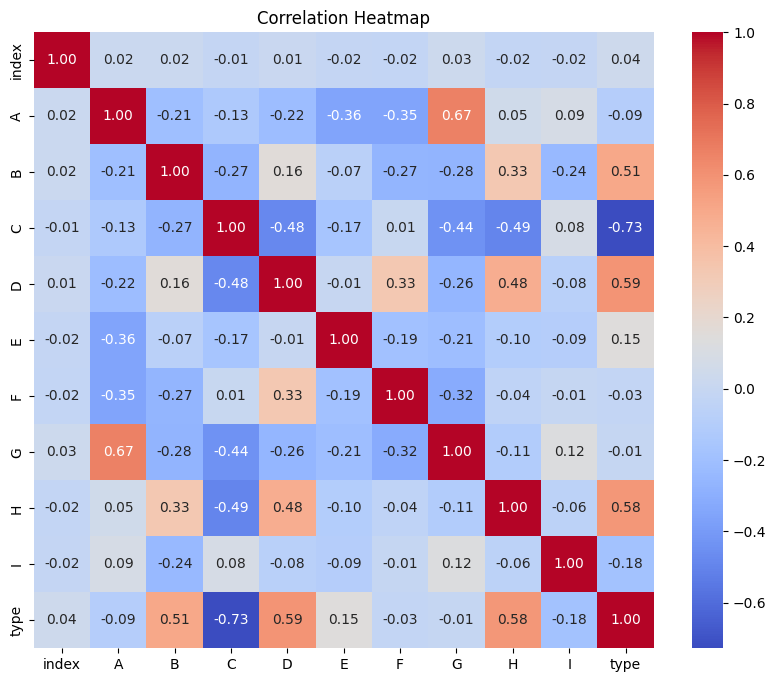

In [431]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [432]:
# Drop the 'index' column
df = df.drop('index', axis=1)
df

,A,B,C,D,E,F,G,H,I,type
0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...
209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [433]:
# Training and test data split (70:30)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=2442)

Class distribution in training data:
type
0    56
1    50
5    19
2    12
3     7
4     5
Name: count, dtype: int64

Class distribution in test data:
type
1    26
0    14
5    10
3     6
2     5
4     4
Name: count, dtype: int64



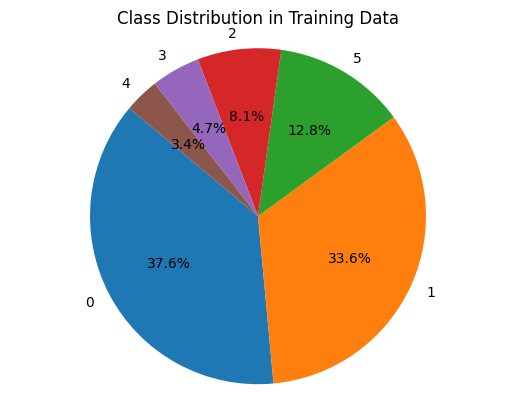

In [434]:
# Display class distribution in training and test data
print("Class distribution in training data:")
train_value_counts = df_train['type'].value_counts()
print(train_value_counts)

print("\nClass distribution in test data:")
print(df_test['type'].value_counts())
print()

labels = train_value_counts.index
plt.pie(train_value_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution in Training Data")
plt.axis('equal')
plt.show()

In [435]:
X_train = df_train.drop('type', axis=1)
y_train = df_train['type']
X_test = df_test.drop('type', axis=1)
y_test = df_test['type']

In [436]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [437]:
# Train the model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [438]:
# Prediction on the training data
y_train_pred = model.predict(X_train_scaled)

accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy)

cm = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix on training data:\n", cm)

Accuracy on training data: 0.738255033557047
Confusion matrix on training data:
 [[47  9  0  0  0  0]
 [14 35  0  0  1  0]
 [ 9  3  0  0  0  0]
 [ 0  1  0  6  0  0]
 [ 1  0  0  0  4  0]
 [ 0  0  0  1  0 18]]


In [439]:
# Prediction on the test data
y_test_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test data:", accuracy)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix on test data:\n", cm)

Accuracy on test data: 0.676923076923077
Confusion matrix on test data:
 [[11  3  0  0  0  0]
 [ 6 19  0  0  1  0]
 [ 3  2  0  0  0  0]
 [ 0  2  0  3  0  1]
 [ 0  0  0  0  3  1]
 [ 0  2  0  0  0  8]]


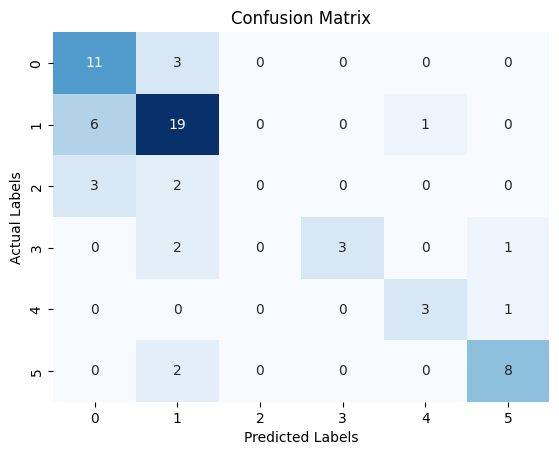

In [440]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()